## <font color="#00bfff">1.Cookie Cats - описание и цель проекта</font>

Cookie Cats — популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедини три», в которой игрок должен соединять плитки одного цвета, чтобы очистить игровое поле и выиграть уровень.
    <p><img src="https://i.ytimg.com/vi/LkvnfULq8yQ/maxresdefault.jpg" style="max-width:350px"></p>
<p>По мере прохождения уровней игры игроки будут время от времени сталкиваться с воротами, которые заставят их ждать нетривиальное количество времени или совершать покупки в приложении для прохождения. Помимо стимулирования покупок в приложении, эти ворота служат важной цели, давая игрокам принудительный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия игрока от игры.</p>
<p><img src="https://assets.datacamp.com/production/project_184/img/cc_gates.png" style="max-width:350px"></p>
<p>Но где должны быть расположены ворота? Первоначально первые ворота были размещены на уровне 30, но в этом проекте проанализируем AB-тест, в котором переместили первые ворота в Cookie Cats с уровня 30 на уровень 40. В частности, рассмотрим влияние на удержание игроков. Приступим к изучению данных.</p>

## <font color="#00bfff">2. Данные и переменные</font>
Имеются данные 90,189 игроков, установивших игру во время тестирования.   
Описание переменных:  

<li><code>userid</code> - уникальный номер каждого пользователя.</li>
<li><code>version</code> - группа пользователей с версией: (<code>gate_30</code> - a gate at level 30) или с версией: (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - количество раундов одним пользователем в течении 14 дней после установки.</li>
<li><code>retention_1</code> - вернулся ли игрок и продолжил играть <strong>1 день</strong> после установки?</li>
<li><code>retention_7</code> - вернулся ли игрок и продолжил играть <strong>7 дней</strong> после установки?</li>

<p>При установки игры пользователь получает версию случайным образом <code>gate_30</code> или <code>gate_40</code>.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("Games_test_А_B.xlsx")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


## <font color="#00bfff">3. Статистический анализ</font>


<p><img src="https://assets.datacamp.com/production/project_184/img/mr_waffles_smiling.png" style="width:150px; float:right;margin: -15px 20px 1px 15px;"> </p>

Проведем анализ данных и выявим отличия между A/B группами в рамках данных переменных. 

Проверим количество участников:

In [5]:
print(f'Всего в исследовании приняло участие {df["userid"].nunique()} игроков')

Всего в исследовании приняло участие 90189 игроков


Проверим количество участников в каждой группе:

In [6]:

df.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


В группах примерно одинаковое количество игроков.  
  
Основное внимание в анализе будет уделено тому, как размещение ворот влияет на удержание игроков.  
Для интереса построим график распределения количества игровых раундов, сыгранных игроками в течение первой недели игры.

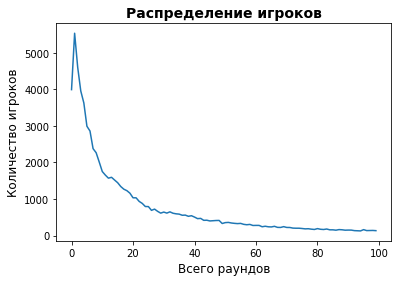

In [8]:
plot_df = df.groupby("sum_gamerounds")["userid"].count()

ax = plot_df.head(100).plot()
plt.title("Распределение игроков", fontweight="bold", size=14)
plt.xlabel("Всего раундов", size=12)
plt.ylabel("Количество игроков", size=12)
plt.show()

На графике видно, некоторые игроки устанавливают игру, но никогда не играют в нее (0 игровых раундов). Найдем, сколько их.

In [12]:
print(f'Игроки кто установил, но ни разу не играл: {df[df["sum_gamerounds"]== 0]["userid"].count()}')

Игроки кто установил, но ни разу не играл: 3994


<p><img src="https://assets.datacamp.com/production/project_184/img/belle_cookie.png" style="width:150px; float:right"> </p>

3994 игроков установили игру но ни разу не играли. Не слишком ли это много?

A common metric in the video gaming industry for how fun and engaging a game is retention: The percentage of players that come back and play the game 1-day and 7-days after they have installed it. The higher retention is, the easier it is to retain players and build a large player base.

As a first step, let's look at what 1-day and 7-days retentions are overall.
Обычный показатель в индустрии видеоигр для оценки того, насколько увлекательной и увлекательной является УДЕРЖАНИЕ: процент игроков, которые возвращаются и играют в игру через 1 и 7 дней после ее установки. Чем выше показатель удержания, тем легче удержать игроков и создать большую базу игроков.

В качестве первого шага посмотрим показатели 1-дневное и 7-дневное удержание в целом.

In [15]:
df_retention = df[["retention_1","retention_7"]].mean()*100
print(f"1-день удержание: {round(df_retention[0],2)}% \
      \n7-дней удержание: {round(df_retention[1],2)}%")

1-день удержание: 44.52%       
7-дней удержание: 18.61%


Через сутки после установки игры возвращается чуть меньше половины игроков.   
18% игроков возвращаются через 7 дней после установки игры.

Получив контрольный показатель посмотрим, как различаются коэффициенты удержания между двумя группами A/B.

In [16]:

df_retention_ab = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.448188,0.190201,2344795
gate_40,45489,0.442283,0.182000,2333530


<p><img src="https://assets.datacamp.com/production/project_184/img/ziggy_smiling.png" style="width:150px; float:left;margin:20px 10px 5px 5px;"> </p>

* Наблюдалось небольшое снижение однодневного удержания, когда ворота были перемещены на уровень 40 (44,2%), по сравнению с контрольной группой, когда они находились на уровне 30 (44,8%).
​
* Опять же, снижение 7-дневного удержания, когда ворота были перемещены на уровень 40 (18,2%), по сравнению с контрольной группой, когда они находились на уровне 30 (19,8%).
​
* Это небольшое изменение, но даже небольшие изменения в удержании могут иметь большое значение. Хоть мы уверены в разнице данных, но насколько мы можем быть уверены, что ворота на уровне 40 в будущем будут также хуже?
​
Есть несколько способов, которыми мы можем получить достоверность этих показателей удержания. Здесь мы будем использовать
​ **bootstrapping.**

## <font color="#00bfff"> 4. A/B Тестирование: Bootstrapping </font>

**Описание метода:**

<p><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Stratified_sampling.PNG/300px-Stratified_sampling.PNG" style=" float: right;margin:5px 20px 5px 1px; max-width:250px"></p>

Мы будем использовать **bootstrapping** для A/B-тестирования. Основная идея bootstrapping заключается в том, что вывод о генеральной совокупности на основе данных выборки (выборка → совокупность) может быть смоделирован путем повторной выборки данных выборки и выполнения вывода о выборке из данных повторной выборки (повторная выборка → выборка). Поскольку совокупность неизвестна, истинная ошибка выборочной статистики по отношению к ее значению совокупности неизвестна. 

**Последовательность тестирования:**

1. Создание 500 образцов набора данных **(начальная загрузка)**
2. Расчет удержания за 1 и 7 дней для групп A/B.
3. Построение загрузочных дистрибутивов
4. Расчет разницы коэффициентов удержания между двумя группами A/B.
5. Расчет вероятности того, что показатели удержания за 1 и 7 дней будут выше, когда ворота находятся на уровне 30.
6. Оценка результатов и вынесение рекомендаций

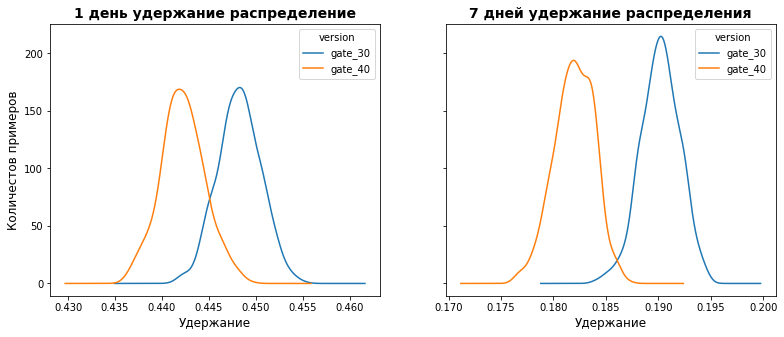

In [21]:

# Создаем списков bootstrapped means для обеих групп 
boot_1d = []
boot_7d = []
for i in range(500):
    boot_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)
    
# Трансформирование списка в базу данных
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)
# # График оценки плотности ядра bootstrap распределений
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))
boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("Удержание",size=12)
ax1.set_ylabel("Количестов примеров",size=12)
ax1.set_title("1 день удержание распределение", fontweight="bold",size=14)
boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("Удержание",size=12)
ax2.set_title("7 дней удержание распределения", fontweight="bold",size=14)
plt.show()



Два распределения выше представляют собой бутстрепную неопределенность в отношении того, каким может быть базовое 1-дневное и 7-дневное удержание для двух групп A/B. На графике можно увидеть, что есть некоторые признаки разницы, хотя и небольшой. Увеличим различия.  

##(Обратите внимание, что в этой записной книжке мы ограничили количество загрузочных репликаций до 500, чтобы ускорить расчеты. В «производственной среде» мы, вероятно, увеличили бы это число до гораздо большего числа, скажем, до 10 000.)

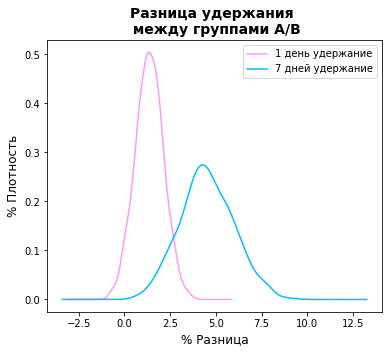

In [23]:
# Добавление столбца с разницей в % между двумя группами A/B
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)
# Построение bootstrap разницы в % 
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "1 день удержание")
boot_7d['diff'].plot.kde(ax=ax1, c= "#00bfff", label = "7 дней удержание")
ax1.set_xlabel("% Разница",size=12)
ax1.set_ylabel("% Плотность",size=12)
ax1.set_title("Разница удержания \n между группами А/В", fontweight="bold", size=14)
plt.legend()
plt.show()

<p><img src="https://assets.datacamp.com/production/project_184/img/ziggy_smiling.png" style="width:100px; float:left; margin:10px 10px 5px 5px;"> </p>
<p>Из этой диаграммы видно, что наиболее вероятная разница в процентах составляет около 1–2% для 1-дневного удержания.   
Для 7-дневного удержания наиболее вероятная разница в процентах составляет около 2–5%.   
Причем большая часть распределения выше 0%, в пользу gate на 30 уровне. Но какова вероятность, что разница выше 0%? Проверим это.</p>

In [25]:
#Расчет вероятности того, что 1-дневное удержание выше, когда гейт находится на уровне 30
prob_1 = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])
# Расчет вероятности того, что 7-дневное удержание выше, когда гейт находится на уровне 30
prob_7 = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

print(f"Вероятность того, что 1-дневное удержание выше, когда ворота находятся на уровне 30: {round(prob_1,2)*100}% \
      \nВероятность того, что 7-дневное удержание выше, когда ворота находятся на уровне 30: {(prob_7)*100}% ")

Вероятность того, что 1-дневное удержание выше, когда ворота находятся на уровне 30: 96.0%       
Вероятность того, что 7-дневное удержание выше, когда ворота находятся на уровне 30: 100.0% 


## <font color="00bfff">5. Вывод</font>

<p><img src="https://assets.datacamp.com/production/project_184/img/cookie_yellow.png" style="width:150px; float:right"> </p>
Результат bootstrap говорит нам о том, что существуют убедительные доказательства **99,8% вероятности** того, что 7-дневное удержание выше, когда ворота находятся на уровне 30, чем когда они находятся на уровне 40.

Вывод таков: если мы хотим поддерживать высокий уровень удержания — как 1-дневный, так и 7-дневный — мы не должны <strong>не</strong> перемещать ворота с уровня 30 на уровень 40. Конечно, есть и другие показатели. мы могли бы посмотреть, например, на количество сыгранных игровых раундов или количество внутриигровых покупок, сделанных двумя группами AB. Но удержание <em>является</em> одним из самых важных показателей.
